<a href="https://colab.research.google.com/github/Hitesh123mori/HandlingMissingValue-RandomValueImputation-MachineLearning/blob/main/RandomValueImputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### categorical Data Imputaion

In [661]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [662]:
df = pd.read_csv("DatasetHouse.csv")

In [663]:
df.shape

(26, 6)

In [664]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          26 non-null     object
 1   Id            26 non-null     int64 
 2   City          19 non-null     object
 3   House Number  19 non-null     object
 4   Firesafty     16 non-null     object
 5   Sale Price    17 non-null     object
dtypes: int64(1), object(5)
memory usage: 1.3+ KB


In [665]:
df.isnull().mean()*100

Name             0.000000
Id               0.000000
City            26.923077
House Number    26.923077
Firesafty       38.461538
Sale Price      34.615385
dtype: float64

In [666]:
df1 = df.drop(columns = ['Name','Id'])
df1.sample(5)

,City,House Number,Firesafty,Sale Price
23,NaN,NaN,NaN,NaN
20,Ahmedabad,D12,NaN,NaN
19,Nasik,D12,Best,NaN
17,NaN,A45,Best,9cr
15,Ahmedabad,D12,Medium,3cr


In [667]:
from sklearn.model_selection import train_test_split

In [668]:
x = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

In [669]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [670]:
x_train.sample(5)

,City,House Number,Firesafty
14,NaN,NaN,NaN
7,Ahmedabad,C09,Best
10,Delhi,C67,Not Good
5,NaN,A34,Best
22,Mumbai,D12,Good


In [671]:
x_test.sample(5)

,City,House Number,Firesafty
17,NaN,A45,Best
15,Ahmedabad,D12,Medium
24,NaN,D12,NaN
20,Ahmedabad,D12,NaN
1,Mumbai,A34,Best


In [672]:
y_train.sample(5)

8     1cr
9     5cr
13    1cr
6     NaN
22    3cr
Name: Sale Price, dtype: object

In [673]:
y_test.sample(5)

20     NaN
17     9cr
24     NaN
21    12cr
1      NaN
Name: Sale Price, dtype: object

In [674]:
x_train['Imputed_City'] = x_train['City']
x_test['Imputed_City'] = x_test['City']

x_train['Imputed_House Number'] = x_train['House Number']
x_test['Imputed_House Number'] = x_test['House Number']

x_train['Imputed_Firesafty']  = x_train['Firesafty']
x_test['Imputed_Firesafty'] =  x_test['Firesafty']

In [675]:
x_train.sample(5)

,City,House Number,Firesafty,Imputed_City,Imputed_House Number,Imputed_Firesafty
12,Mumbai,D45,Not Good,Mumbai,D45,Not Good
4,Mumbai,C90,NaN,Mumbai,C90,NaN
19,Nasik,D12,Best,Nasik,D12,Best
16,Nasik,G45,NaN,Nasik,G45,NaN
22,Mumbai,D12,Good,Mumbai,D12,Good


In [676]:
x_train['Imputed_City'][x_train['Imputed_City'].isnull()]=x_train['City'].dropna().sample(x_train['City'].isnull().sum()).values
x_test['Imputed_City'][x_test['Imputed_City'].isnull()] = x_test['City'].dropna().sample(x_test['City'].isnull().sum()).values

x_train['Imputed_House Number'][x_train['House Number'].isnull()] = x_train['House Number'].dropna().sample(x_train['House Number'].isnull().sum()).values
x_test['Imputed_House Number'][x_test['House Number'].isnull()] = x_test['House Number'].dropna().sample(x_test['House Number'].isnull().sum()).values


x_train['Imputed_Firesafty'][x_train['Firesafty'].isnull()] = x_train['Firesafty'].dropna().sample(x_train['Firesafty'].isnull().sum()).values
x_test['Imputed_Firesafty'][x_test['Firesafty'].isnull()]   = x_test['Firesafty'].dropna().sample(x_test['Firesafty'].isnull().sum()).values


In [677]:
x_train.sample(5)

,City,House Number,Firesafty,Imputed_City,Imputed_House Number,Imputed_Firesafty
7,Ahmedabad,C09,Best,Ahmedabad,C09,Best
14,NaN,NaN,NaN,Delhi,D45,Best
9,NaN,F34,Best,Ahmedabad,F34,Best
13,Mumbai,D67,Medium,Mumbai,D67,Medium
11,NaN,NaN,NaN,Mumbai,A87,Good


In [678]:
x_train.isnull().mean()

City                    0.25
House Number            0.30
Firesafty               0.40
Imputed_City            0.00
Imputed_House Number    0.00
Imputed_Firesafty       0.00
dtype: float64

In [679]:
x_train_before = x_train[['City','House Number','Firesafty']]
x_train_after = x_train[['Imputed_City','Imputed_House Number','Imputed_Firesafty']]

<Axes: ylabel='Density'>

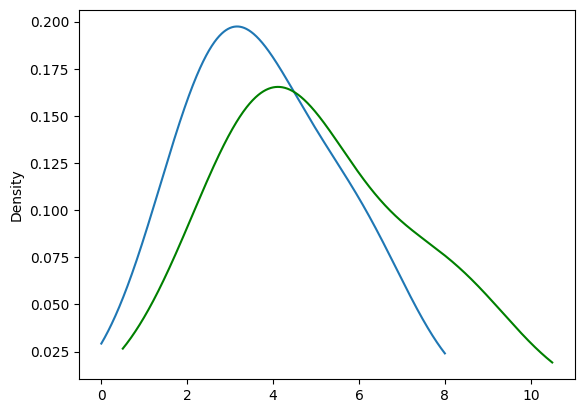

In [680]:
fig  = plt.figure()
ax = fig.add_subplot()

x_train_before['City'].value_counts().plot(kind= 'kde',ax=ax)
x_train_after['Imputed_City'].value_counts().plot(kind='kde',ax=ax,color = 'green')

<Axes: ylabel='Density'>

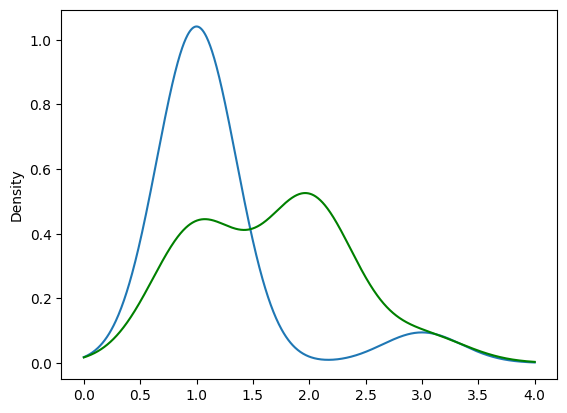

In [681]:
fig  = plt.figure()
ax = fig.add_subplot()

x_train_before['House Number'].value_counts().plot(kind= 'kde',ax=ax)
x_train_after['Imputed_House Number'].value_counts().plot(kind='kde',ax=ax,color = 'green')

<Axes: ylabel='Density'>

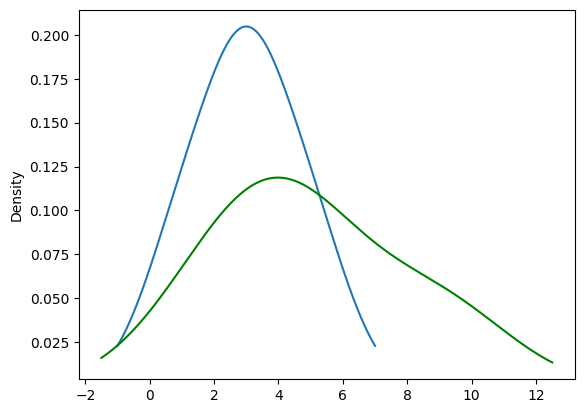

In [682]:
fig  = plt.figure()
ax = fig.add_subplot()

x_train_before['Firesafty'].value_counts().plot(kind= 'kde',ax=ax)
x_train_after['Imputed_Firesafty'].value_counts().plot(kind='kde',ax=ax,color = 'green')

In [683]:
temp1 = pd.concat([


            x_train_before['City'].value_counts(),
            x_train_after['Imputed_City'].value_counts()

], axis=1)

temp1.columns = ['Before','After']

temp1

,Before,After
Mumbai,6,8
Nasik,4,4
Delhi,3,5
Ahmedabad,2,3


In [684]:
temp2 = pd.concat([


            x_train_before['House Number'].value_counts(),
            x_train_after['Imputed_House Number'].value_counts()

], axis=1)

temp2.columns = ['Before','After']

temp2

,Before,After
D12,3,3
E78,1,1
D67,1,2
G45,1,2
A87,1,2
C09,1,1
A34,1,1
C90,1,1
C67,1,1
D45,1,2


In [685]:
temp3 = pd.concat([


            x_train_before['Firesafty'].value_counts(),
            x_train_after['Imputed_Firesafty'].value_counts()

], axis=1)

temp3.columns = ['Before','After']

temp3

,Before,After
Best,5,9
Not Good,3,5
Good,3,4
Medium,1,2


### For Numerical Data

In [700]:
df2 = pd.read_csv("DatasetMarks.csv")

In [701]:
df2.shape

(6, 6)

In [702]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    6 non-null      object 
 1   Age     4 non-null      float64
 2   Mark1   3 non-null      float64
 3   Mark2   4 non-null      float64
 4   Mark3   3 non-null      float64
 5   Total   0 non-null      float64
dtypes: float64(5), object(1)
memory usage: 416.0+ bytes


In [703]:
df2.isnull().mean()

Name      0.000000
Age       0.333333
Mark1     0.500000
Mark2     0.333333
Mark3     0.500000
Total     1.000000
dtype: float64

In [704]:
x1 = df2.iloc[:,:-1]
y1 = df2.iloc[:,-1]

In [705]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.2)

In [706]:
x1_train.sample(2)

,Name,Age,Mark1,Mark2,Mark3
3,D,13.0,87.0,NaN,87.0
0,A,12.0,78.0,76.0,56.0


In [707]:
y1_test.sample(2)

2   NaN
1   NaN
Name: Total, dtype: float64

In [708]:
x1_train["Imputed_Age"] = x1_train['Age']
x1_test["Imputed_Age"] = x1_test['Age']

x1_train["Imputed_Mark1"] = x1_train['Mark1 ']
x1_test["Imputed_Mark1"] = x1_test["Mark1 "]

x1_train["Imputed_Mark2"] = x1_train["Mark2"]
x1_test["Imputed_Mark2"]  = x1_test["Mark2"]

x1_train["Imputed_Mark3"] = x1_train["Mark3"]
x1_test["Imputed_Mark3"]  = x1_test["Mark3"]

In [709]:
x1_train.sample(2)

,Name,Age,Mark1,Mark2,Mark3,Imputed_Age,Imputed_Mark1,Imputed_Mark2,Imputed_Mark3
5,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E,11.0,90.0,78.0,NaN,11.0,90.0,78.0,NaN


In [717]:
x1_train['Imputed_Age'][x1_train['Imputed_Age'].isnull()]= x1_train['Age'].dropna().sample(x1_train['Age'].isnull().sum()).values
x1_test['Imputed_Age'][x1_test['Imputed_Age'].isnull()] = x1_test['Age'].dropna().sample(x1_test['Age'].isnull().sum()).values


<ipython-input-717-0e573246a5c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1_train['Imputed_Age'][x1_train['Imputed_Age'].isnull()]= x1_train['Age'].dropna().sample(x1_train['Age'].isnull().sum()).values
<ipython-input-717-0e573246a5c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1_test['Imputed_Age'][x1_test['Imputed_Age'].isnull()] = x1_test['Age'].dropna().sample(x1_test['Age'].isnull().sum()).values


In [710]:
x1_train_before = x1_train[['Age']]
x1_train_after = x1_train[['Imputed_Age']]

In [711]:
x1_train_before.sample(3)

,Age
0,12.0
5,NaN
3,13.0


In [712]:
x1_train_after.sample(3)

,Imputed_Age
4,11.0
0,12.0
5,NaN


In [713]:
x1_train_before.isnull().mean()

Age    0.25
dtype: float64

In [714]:
x1_train_after.isnull().mean()

Imputed_Age    0.25
dtype: float64

<Axes: >

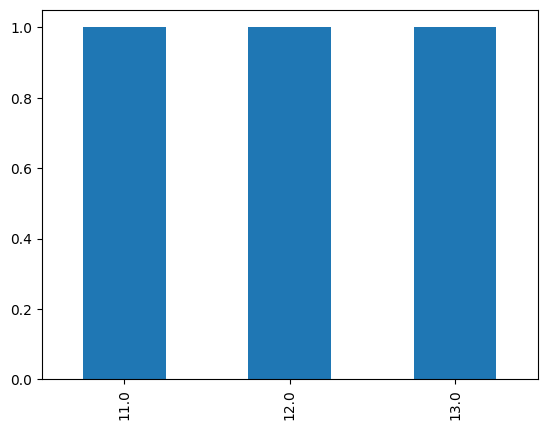

In [715]:
x1_train_before["Age"].value_counts().plot(kind="bar")

<Axes: >

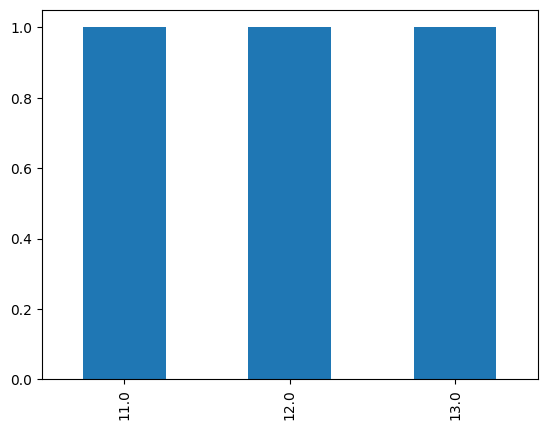

In [716]:
x1_train_after["Imputed_Age"].value_counts().plot(kind="bar")